<a href="https://colab.research.google.com/github/Sagnik2612/Data-Science-and-Business-Analytics-tasks-/blob/main/K_Means_on_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting using Unsupervised  Machine Learning**

In this task we implement K-Means clustering on the given Iris dataset to identify the different classes of the Iris plant.
1. The Elbow method  will provide us the optimum number of clusters obtained iteratively and deciphered visually
2. We run the algorithm with that optimal k-number, train the model with crucial features from the dataset, find the centroids of the final clusters
3. Plot the final feature 1 vs feature 2 2D map with scattered and identified clusters of Iris plants and the final centroids.

# Importing the necessary libraries

In [1]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets as dt

# Importing the dataset

In [2]:
iris=dt.load_iris()#calling load_iris() function from the datasets class
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now we extract the necessary features recquired for model training

In [16]:
X=df.iloc[:,[0,1,2,3]].values #Extracts all the rows and only the columns with numerical (not categorical data)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# 1.Using Elbow Method to find the Optimal Number of clusters

We will implement the Elbow method using the KMeans class from the cluster modele of Scikit-Learn.The k-means algorithm is run over several number of clusters (iteratively) each time with a different number of cluster and compute the WCSS (within cluster sum of squares) and plot it against the number of clusters and check how it changes. From that plot we will decipher the optimal number of k-numbers (clusters).

The WCSS is the sum of square of each observation point of the cluster and it's centroid.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

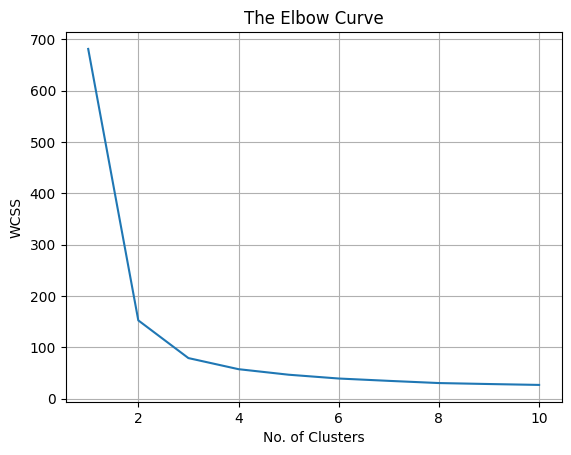

In [4]:
from sklearn.cluster import KMeans
wcss=[] #this list will store each wcss value for each iteration (current no. of clusters)
#Let us use 10 such clusters and compute the wcss for 10 of them
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  #forms 10 such kmeans objects of the KMeans class each for the current number of clusters given by the loop index 'i'
  #The k-means++ function in the 2nd argument ensures that the random initialization of centroid positions do not hamper the outcome of the model(showing the wrong clusters)
  #A fixed random_state seed ensures we get the same results on each run of the code
  #We now train the model with 'i' such clusters
  kmeans.fit(X) #training the model with the matrix of features
  wcss.append(kmeans.inertia_) #the inertia_ attribute of the KMeans class helps us fetch the wcss values for the i th cluster through the kmeans object

#Plotting the no. of clusters vs wcss curve
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters",size=10)
plt.ylabel("WCSS",size=10)
plt.title("The Elbow Curve")
plt.grid()
plt.show()


We can see that the WCSS drops off hyperbolically and starts slowing down after reaching the elbow at Number of Clusters=3 and the clusters are thus finally segregated. Thus our optimum number of clusters is 3.

# 2.Training the K-Means model on the dataset

We use the KMeans classifier that we had used iteratively to 3 optimal clusters and then make predictions based on an object of that class.

In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter = 300, n_init = 10,random_state=42)
y_pred=kmeans.fit_predict(X) #trains and returns the dependant variable y_pred that contains the Cluster labels correctly identified for each species
print(y_pred) # the labels "0","1","2" would represent the 3 identified clusters

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# 3.Plotting the results

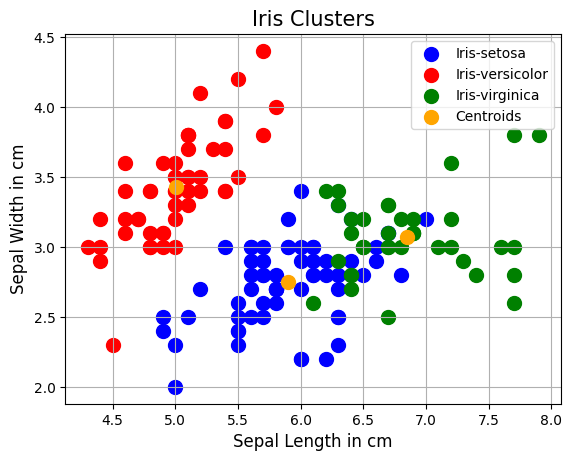

In [15]:
#Plotting the relevant clusters on a 2D Map

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'red', label = 'Iris-versicolor')
plt.scatter(X[y_pred== 2, 0], X[y_pred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label = 'Centroids') #cluster_centers_ function gives us the centers of the identified clusters
plt.xlabel("Sepal Length in cm",size=12)
plt.ylabel("Sepal Width in cm",size=12)
plt.title("Iris Clusters",size=15)
plt.grid()
plt.legend()
plt.show()
